## NER with NLTK
A scraped news article will be loaded into your workspace. Your task is to use `nltk` to find the named entities in this article. 

What might the article be about, given the names you found?

In [5]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from artifacts import article

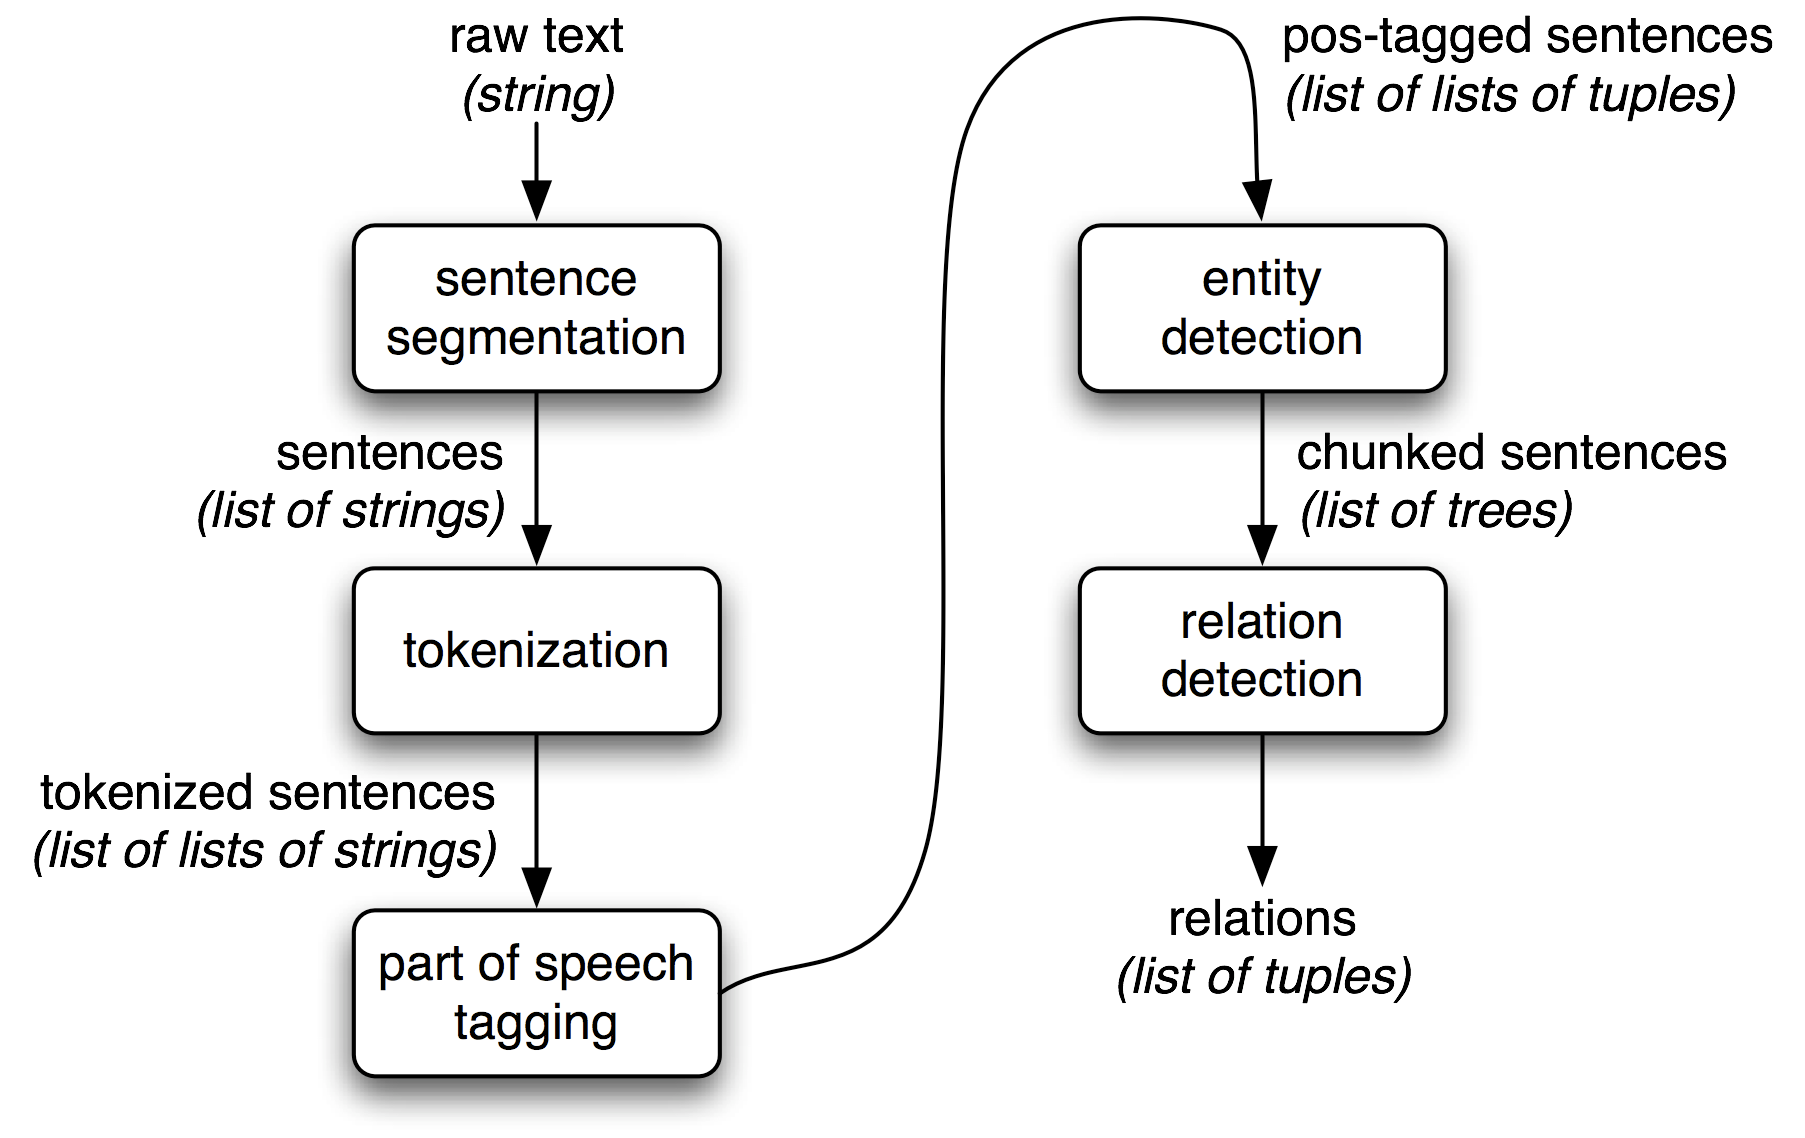

**Instructions**
- Tokenize `article` into sentences.
- Tokenize each sentence in `sentences` into words using a list comprehension.
- Inside a list comprehension, tag each tokenized sentence into parts of speech using `nltk.pos_tag()`.
- Chunk each tagged sentence into named-entity chunks using `nltk.ne_chunk_sents()`. Along with `pos_sentences`, specify the additional keyword argument `binary=True`.
- Loop over each sentence and each chunk, and test whether it is a named-entity chunk by testing if it has the attribute `label`, and if the `chunk.label()` is equal to `"NE"`. If so, print that chunk.

In [3]:
# Tokenize the article into sentences: sentences
sentences = sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)


(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


## Charting practice

In this exercise, you'll use some extracted named entities and their groupings from a series of newspaper articles to chart the diversity of named entity types in the articles.

You'll use a `defaultdict` called `ner_categories`, with keys representing every named entity group type, and values to count the number of each different named entity type. 

In [26]:
chunked_sentences = nltk.ne_chunk_sents(pos_sentences)

You now have a chunked sentence list called `chunked_sentences` similar to the last exercise, but this time with non-binary category names.

You can use `hasattr()` to determine if each chunk has a `'label'` and then simply use the chunk's `.label()` method as the dictionary key.

**Instructions 1/3**
* Create a defaultdict called `ner_categories`, with the default type set to `int`.

In [25]:
from collections import defaultdict
# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

**Instructions 2/3**
- Fill up the dictionary with values for each of the keys. Remember, the keys will represent the `label()`.
    - In the outer for loop, iterate over `chunked_sentences`, using sent as your iterator variable.
    - In the inner for loop, iterate over `sent`. If the condition is true, increment the value of each key by 1.
    - *Remember to use the chunk's .label() method as the key!*
- For the pie chart labels, create a list called `labels` from the keys of `ner_categories`, which can be accessed using `.keys()`.

In [27]:
# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

**Instructions 3/3**

- Use a list comprehension to create a list called `values`, using the `.get()` method on `ner_categories` to compute the values of each label `v`.
- Use `plt.pie()` to create a pie chart for each of the NER categories. Along with `values` and `labels=labels`, pass the extra keyword arguments `autopct='%1.1f%%'` and `startangle=140` to add percentages to the chart and rotate the initial start angle.
- Display your pie chart. Was the distribution what you expected?

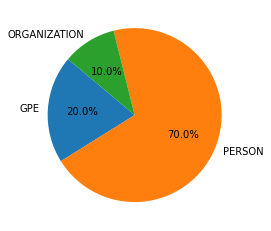

In [28]:
import matplotlib.pyplot as plt

# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

## Introduction to `SpaCy`

## Comparing NLTK with spaCy NER

Using the same text you used in the first exercise of this chapter, you'll now see the results using spaCy's NER annotator. How will they compare?

The article has been pre-loaded as `article`. To minimize execution times, you'll be asked to specify the keyword arguments `tagger=False, parser=False, matcher=False` when loading the spaCy model, because you only care about the entity in this exercise.

**Instructions**

- Import `spacy`.
- Load the `'en'` model using `spacy.load()`. Specify the additional keyword arguments `tagger=False, parser=False, matcher=False`.
- Create a `spacy` document object by passing article into `nlp()`.
- Using `ent` as your iterator variable, iterate over the entities of `doc` and print out the labels (`ent.label_`) and text (`ent.text`).

In [6]:
# Import spacy
import spacy

# Instantiate the English model: nlp
nlp = spacy.load("en", tagger=False, parser=False, matcher=False)

# Create a new document: doc
doc = nlp(article)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)


PERSON Uber
PERSON Uber
ORG Apple
PERSON Uber
PERSON Uber
PERSON Uber
PERSON Uber
PERSON Travis Kalanick
GPE Uber
PERSON Tim Cook
ORG Apple
CARDINAL Millions
PERSON Uber
LOC Silicon Valley
ORG Yahoo
PERSON Marissa Mayer
MONEY 186


## Multilingual NER with polyglot

## French NER with polyglot I

In this exercise and the next, you'll use the `polyglot` library to identify French entities. The library functions slightly differently than `spacy`, so you'll use a few of the new things you learned in the last video to display the named entity text and category.

You have access to the full article string in `article`. Additionally, the `Text` class of `polyglot` has been imported from `polyglot.text`.

**Instructions**

- Using the article string in `article`, create a new `Text` object called `txt`.
- Iterate over `txt.entities` and print each entity, `ent`.
- Print the `type()` of `ent`.


In [25]:
from polyglot.text import Text
from french_article import article

# Create a new text object using Polyglot's Text class: txt
txt = Text(article)

# Print each of the entities found
for ent in txt.entities:
    print(ent)
    
# Print the type of ent
print(type(ent))


['Charles', 'Cuvelliez']
['Charles', 'Cuvelliez']
['Bruxelles']
['l’IA']
['Julien', 'Maldonato']
['Deloitte']
['Ethiquement']
['l’IA']
['.']
<class 'polyglot.text.Chunk'>


## French NER with polyglot II

Here, you'll complete the work you began in the previous exercise.

Your task is to use a list comprehension to create a list of tuples, in which the first element is the entity tag, and the second element is the full string of the entity text.

**Instructions**


- Use a list comprehension to create a list of tuples called `entities`.
- The output expression of your list comprehension should be a tuple.
    - The first element of each tuple is the entity tag, which you can access using its `.tag` attribute.
    - The second element is the full string of the entity text, which you can access using `.join(ent)`.
- Your iterator variable should be `ent`, and you should iterate over all of the entities of the `polyglot` `Text` object, `txt`.
- Print `entities` to see what you've created.

In [26]:
# Create the list of tuples: entities
entities = [(ent.tag, ' '.join(ent)) for ent in txt.entities]

# Print entities
print(entities)


[('I-PER', 'Charles Cuvelliez'), ('I-PER', 'Charles Cuvelliez'), ('I-ORG', 'Bruxelles'), ('I-PER', 'l’IA'), ('I-PER', 'Julien Maldonato'), ('I-ORG', 'Deloitte'), ('I-PER', 'Ethiquement'), ('I-LOC', 'l’IA'), ('I-PER', '.')]


## Spanish NER with polyglot 

You'll continue your exploration of `polyglot` now with some Spanish annotation. This article is not written by a newspaper, so it is your first example of a more blog-like text. How do you think that might compare when finding entities?

The `Text` object has been created as `txt`, and each entity has been printed, as you can see in the IPython Shell.

Your specific task is to determine how many of the entities contain the words "Márquez" or "Gabo" - these refer to the same person in different ways!`m

In [33]:
from spanish_blog import txt

**Instructions**

- Iterate over all of the entities of `txt`, using `ent` as your iterator variable.
- Check whether the entity contains `"Márquez"` or `"Gabo"`. If it does, increment count. Don't forget to include the accented `á` in `"Márquez"`!
- See what percentage of entities refer to Gabriel García Márquez (aka Gabo).

In [41]:
# Initialize the count variable: count
count = 0

# Iterate over all the entities
for ent in txt.entities:
    # Check whether the entity contains 'Márquez' or 'Gabo'
    if ('Márquez' in ent or 'Gabo' in ent):
        # Increment count
        count+=1

# Print count
print(count)

# Calculate the percentage of entities that refer to "Gabo": percentage
percentage = count / len(txt.entities)
print(percentage)


4
0.26666666666666666
